#Problema 14 de la guía 9
## S. Schiavinato - LU 153/11

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats #Contiene distribuciones útiles
import scipy.optimize as opt
%matplotlib inline
plt.rcParams["figure.figsize"] = (6 * (1 + np.sqrt(5)) / 2, 6)
plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 20

Datos para ambos problemas

In [3]:
σ = 0.3
X = np.array([2.00,2.10,2.20,2.30,2.40,2.50,2.60,2.70,2.80,2.90,3.00])
Y = np.array([2.78,3.29,3.29,3.33,3.23,3.69,3.46,3.87,3.62,3.40,3.99])

Ajustes por cuadrados mínimos

In [5]:
def cuadrados_minimos(X, Y, σY):
    N = X.size
    Δ = N * np.sum(X**2) - np.sum(X)**2
    A1 = (np.sum(X**2) * np.sum(Y) - np.sum(X) * np.sum(X*Y))/Δ
    A2 = (N * np.sum(X*Y) - np.sum(X) * np.sum(Y))/Δ
    Σ11 = σY**2 / Δ * np.sum(X**2)
    Σ22 = σY**2/ Δ * N
    Σ12 = σY**2/Δ * (-np.sum(X))
    a = np.array([A1, A2])
    cov = np.array([[Σ11, Σ12],[Σ12, Σ22]])
    return a, cov

###(a) Obtener el Chi2 de cada repetición de la experiencia respecto a la estimación de la curva teórica

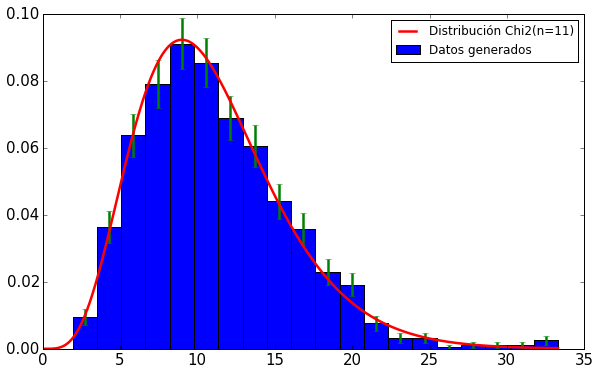

In [19]:
f = lambda x, a, b: a * x + b
N = 1000 #Cantidad de cuentas
a, cov = cuadrados_minimos(X, Y, σ) #Tengo los parámetros de mi curva, que considero mi curva teórica
S = []
for i in range(N):
    Yr = []

    #Acá hay una diferencia. El enunciado pide efectuar el siguiente código 
    for i in np.nditer(X): #Creo un array Yr con valores aleatorios normales para cada x del vector X
        #La población es N(mu = a + b *x; sigma = σ), elemento 0 del ndarray
        Yr.append(np.random.normal(f(i, *a), σ, 1)[0])
    S.append(np.sum(((Yr - f(X, *a))/σ)**2))

S = np.array(S)
#Genero el histograma de los datos
hist, bins = np.histogram(S, bins = 20)
yerr = np.sqrt(hist) / (np.diff(bins) * hist.sum())
hist = hist / (hist.sum() * np.diff(bins))
plt.bar(bins[:-1], hist, width = np.diff(bins), yerr = yerr, ecolor = "g", label = "Datos generados");
t = np.linspace(0, np.amax(S), 1000) #Creo el vector t para graficar la gaussiana acorde
#La gaussiana debe tener la varianza igual al sigma propagado para y(x)
plt.plot(t, stats.chi2(X.shape[0]).pdf(t), 'r-', label = "Distribución Chi2(n={})".format(X.shape[0]));
plt.legend(loc=0);


###(b) Crear el Chi2, pero dejando libre los parámetros para que tengan el valor mínimo 

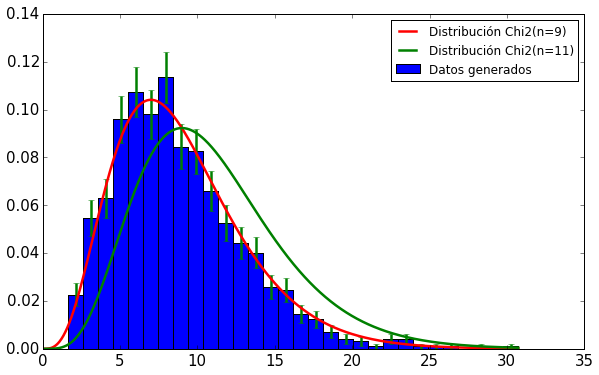

In [41]:
f = lambda x, p: p[0] * x + p[1]
err = lambda p, x, y : (y - f(x, p))/σ
N = 1000 #Cantidad de cuentas
a, cov = cuadrados_minimos(X, Y, σ) #Tengo los parámetros de mi curva, que considero mi curva teórica
S = []
for i in range(N):
    Yr = []
    #Acá hay una diferencia. El enunciado pide efectuar el siguiente código 
    for i in np.nditer(X): #Creo un array Yr con valores aleatorios normales para cada x del vector X
        #La población es N(mu = a + b *x; sigma = σ), elemento 0 del ndarray
        Yr.append(np.random.normal(f(i, a), σ, 1)[0])
    Yr = np.array(Yr)
    
    r, ier = opt.leastsq(err, x0 = (1.5, 0.5), args = (X, Yr))
    S.append(np.sum(err(r, X, Yr)**2))
S = np.array(S)
#Genero el histograma de los datos
hist, bins = np.histogram(S, bins = 30)
yerr = np.sqrt(hist) / (np.diff(bins) * hist.sum())
hist = hist / (hist.sum() * np.diff(bins))
plt.bar(bins[:-1], hist, width = np.diff(bins), yerr = yerr, ecolor = "g", label = "Datos generados");
t = np.linspace(0, np.amax(S), 1000) #Creo el vector t para graficar la gaussiana acorde
#La gaussiana debe tener la varianza igual al sigma propagado para y(x)
plt.plot(t, stats.chi2(X.shape[0] - 2).pdf(t), 'r-', label = "Distribución Chi2(n={})".format(X.shape[0] - 2));
plt.plot(t, stats.chi2(X.shape[0]).pdf(t), 'g-', label = "Distribución Chi2(n={})".format(X.shape[0]));
plt.legend(loc=0);